In [2]:
import pandas as pd
import numpy as np
df_monthly = pd.read_csv('housing_in_london_monthly_variables.csv')
df_yearly = pd.read_csv('housing_in_london_yearly_variables.csv')

In [46]:
df_monthly.head()

date            area  average_price       code  houses_sold  \
0  1995-01-01  city of london          91449  E09000001         17.0   
1  1995-02-01  city of london          82203  E09000001          7.0   
2  1995-03-01  city of london          79121  E09000001         14.0   
3  1995-04-01  city of london          77101  E09000001          7.0   
4  1995-05-01  city of london          84409  E09000001         10.0   

   no_of_crimes  borough_flag  
0           NaN             1  
1           NaN             1  
2           NaN             1  
3           NaN             1  
4           NaN             1

In [47]:
df_yearly.head()

code                  area        date  median_salary  \
0  E09000001        city of london  1999-12-01        33020.0   
1  E09000002  barking and dagenham  1999-12-01        21480.0   
2  E09000003                barnet  1999-12-01        19568.0   
3  E09000004                bexley  1999-12-01        18621.0   
4  E09000005                 brent  1999-12-01        18532.0   

   life_satisfaction mean_salary recycling_pct  population_size  \
0                NaN       48922             0           6581.0   
1                NaN       23620             3         162444.0   
2                NaN       23128             8         313469.0   
3                NaN       21386            18         217458.0   
4                NaN       20911             6         260317.0   

   number_of_jobs  area_size  no_of_houses  borough_flag  
0             NaN        NaN           NaN             1  
1             NaN        NaN           NaN             1  
2             NaN        NaN           NaN             1  
3             NaN        NaN           NaN             1  
4             NaN        NaN           NaN             1

In [14]:
df_19950101 = df_monthly[df_monthly.date=="1995-01-01"]

print("Number of rows in df_19950101 ", len(df_19950101))
print(len(df_19950101.area.unique()))

Number of rows in df_19950101  45
45


In [22]:
df_19950101 = df_monthly[df_monthly.code == "E09000001"]

In [23]:
df_19950101

date            area  average_price       code  houses_sold  \
0    1995-01-01  city of london          91449  E09000001         17.0   
1    1995-02-01  city of london          82203  E09000001          7.0   
2    1995-03-01  city of london          79121  E09000001         14.0   
3    1995-04-01  city of london          77101  E09000001          7.0   
4    1995-05-01  city of london          84409  E09000001         10.0   
..          ...             ...            ...        ...          ...   
296  2019-09-01  city of london         792034  E09000001         11.0   
297  2019-10-01  city of london         827093  E09000001          4.0   
298  2019-11-01  city of london         777610  E09000001          5.0   
299  2019-12-01  city of london         734872  E09000001          NaN   
300  2020-01-01  city of london         775309  E09000001          NaN   

     no_of_crimes  borough_flag  
0             NaN             1  
1             NaN             1  
2             NaN             1  
3             NaN             1  
4             NaN             1  
..            ...           ...  
296           NaN             1  
297           NaN             1  
298           NaN             1  
299           NaN             1  
300           NaN             1  

[301 rows x 7 columns]

In [2]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB


In [3]:
len(df_monthly)

13549

In [4]:
len(df_monthly.columns)

7

In [8]:
#len(df_monthly['date'].unique())
#len(df_monthly['code'].unique())
#len(df_monthly['average_price'].unqiue())
print(len(df_monthly['average_price'].unique()))
print(len(df_monthly['houses_sold'].unique()))


13343
3947


In [47]:
y_train = df_monthly['average_price']

In [48]:
y_train.shape

(13549,)

In [15]:
len(df_monthly.no_of_crimes.unique())


2670

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe02a3ee0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe04aa9d090>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe029742f90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe02a3d5150>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe02a3d58d0>],
 'means': []}

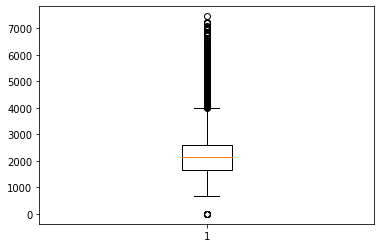

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

non_null_crime = df_monthly[df_monthly.no_of_crimes > 0].no_of_crimes
plt.boxplot(non_null_crime)

     |████████████████████████████████| 292 kB 2.9 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/anaconda3/bin/python -m pip install --upgrade pip' command.


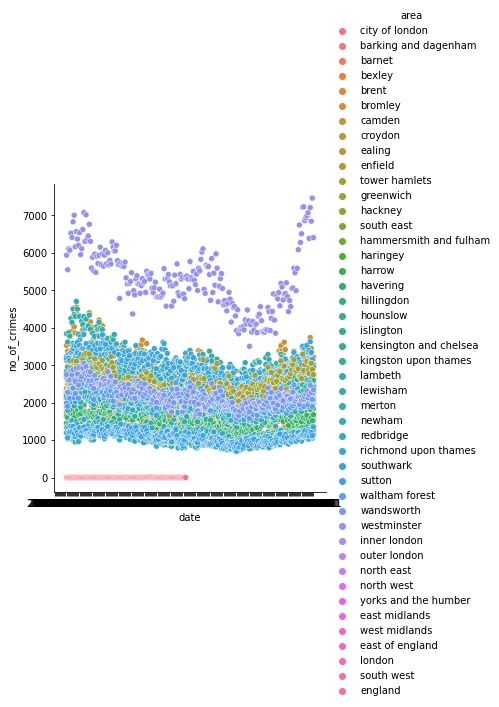

In [40]:
!pip install seaborn
import seaborn
seaborn.relplot(data=df_monthly, x='date', y='no_of_crimes', hue='area')
plt.show()

In [45]:
df_monthly[ (df_monthly.area == 'england') ].no_of_crimes.unique()

array([nan])

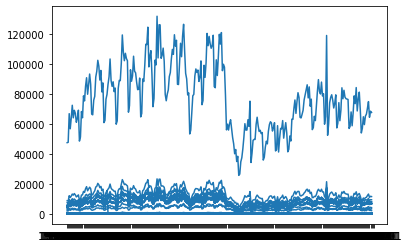

In [36]:
plt.plot(df_monthly.date,df_monthly.houses_sold,)

In [101]:
len(df_monthly['no_of_crimes'].unique())

2670

In [62]:
df_monthly['no_of_crimes'].duplicated()

0        False
1         True
2         True
3         True
4         True
         ...  
13544     True
13545     True
13546     True
13547     True
13548     True
Name: no_of_crimes, Length: 13549, dtype: bool

In [63]:
df_monthly['houses_sold'].duplicated()

0        False
1        False
2        False
3         True
4        False
         ...  
13544    False
13545    False
13546    False
13547     True
13548     True
Name: houses_sold, Length: 13549, dtype: bool

In [64]:
df_monthly['date'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13544     True
13545     True
13546     True
13547     True
13548     True
Name: date, Length: 13549, dtype: bool

In [65]:
df_monthly['area'].duplicated()

0        False
1         True
2         True
3         True
4         True
         ...  
13544     True
13545     True
13546     True
13547     True
13548     True
Name: area, Length: 13549, dtype: bool

In [66]:
df_monthly['code'].duplicated()

0        False
1         True
2         True
3         True
4         True
         ...  
13544     True
13545     True
13546     True
13547     True
13548     True
Name: code, Length: 13549, dtype: bool

In [51]:
x_train = np.array([df_monthly['date'],df_monthly['area'],df_monthly['code'],df_monthly['houses_sold'],df_monthly['no_of_crimes'],df_monthly['borough_flag']])

In [52]:
x_train.shape

(6, 13549)

In [28]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
date             13549 non-null object
area             13549 non-null object
average_price    13549 non-null int64
code             13549 non-null object
houses_sold      13455 non-null float64
no_of_crimes     7439 non-null float64
borough_flag     13549 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB


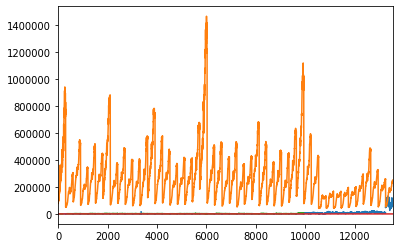

In [30]:
df_monthly['houses_sold'].plot()
df_monthly['average_price'].plot()
df_monthly['no_of_crimes'].plot()
df_monthly['borough_flag'].plot()

0.4422303624179126

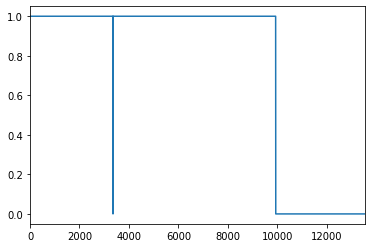

In [34]:
df_monthly['borough_flag'].plot()
df_monthly['borough_flag'].mean()
df_monthly['borough_flag'].std()

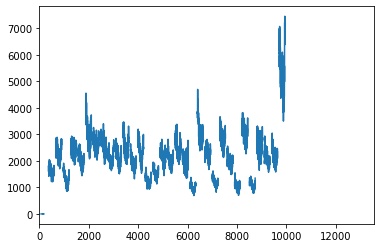

In [32]:
df_monthly['no_of_crimes'].plot()